In [175]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1. Générer les données #

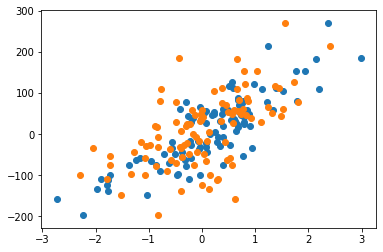

In [176]:
x, y = make_regression(n_samples = 100, n_features = 2, noise = 10)

plt.scatter(x[:,0], y)
plt.scatter(x[:,1], y)

In [177]:
print(x.shape)
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 2)
(100, 1)


In [178]:
# matrice X
X = np.hstack((x, np.ones((x.shape[0], 1))))
X[:10]

array([[ 0.58450677,  1.45405908,  1.        ],
       [-0.30081455,  1.80687067,  1.        ],
       [-0.07068238, -0.05551287,  1.        ],
       [ 1.78894678, -0.79648194,  1.        ],
       [ 0.40418438,  0.7788859 ,  1.        ],
       [ 0.68953458,  0.72349807,  1.        ],
       [ 0.53567934, -0.96953048,  1.        ],
       [-0.03452796, -0.40844252,  1.        ],
       [-1.97129622,  0.13155502,  1.        ],
       [ 1.5212092 ,  0.21917264,  1.        ]])

In [179]:
theta = np.random.randn(3, 1)
theta

array([[-0.64001513],
       [-0.87810408],
       [-1.11931402]])

# 2. Définition du modèle #

In [180]:
def model(X,theta):
    return X.dot(theta)

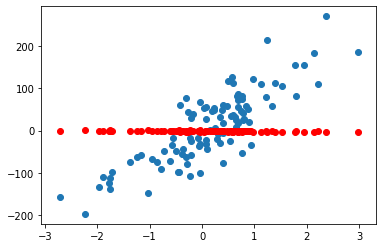

In [181]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], model(X, theta), c = 'r')

# 3. Fonction coût #

In [182]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [183]:
cost_function(X, y, theta)

3802.428235944

# 4. Descente de gradient #

In [184]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [185]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y , theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

# 5. Entraînement #

In [186]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate = 0.01, n_iterations = 1000)

In [187]:
theta_final

array([[68.30482059],
       [50.25183485],
       [-2.27590418]])

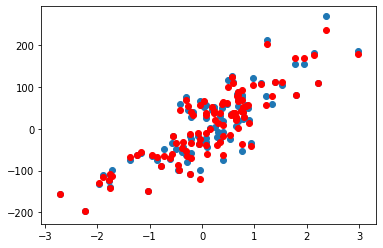

In [191]:
predictions = model(X, theta_final)
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], predictions, c = 'r')

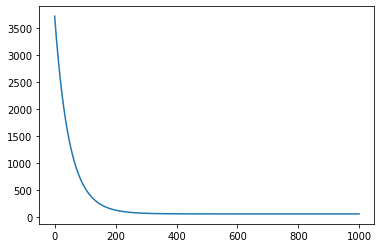

In [192]:
plt.plot(range(1000), cost_history)

In [193]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [194]:
coef_determination(y, predictions)

0.9834866542011563

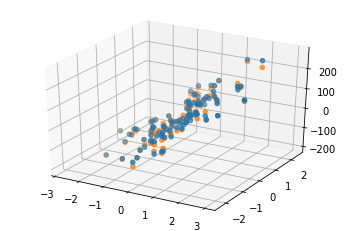

In [202]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], predictions)